In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_wine

In [3]:
wine = pd.DataFrame(load_wine()["data"], columns=load_wine()["feature_names"])

In [4]:
wine["target"] = load_wine()["target"]

#### unique targets

In [5]:
wine["target"].unique()

array([0, 1, 2])

#### Data correlation

In [6]:
wine.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


#### Correlation to Target

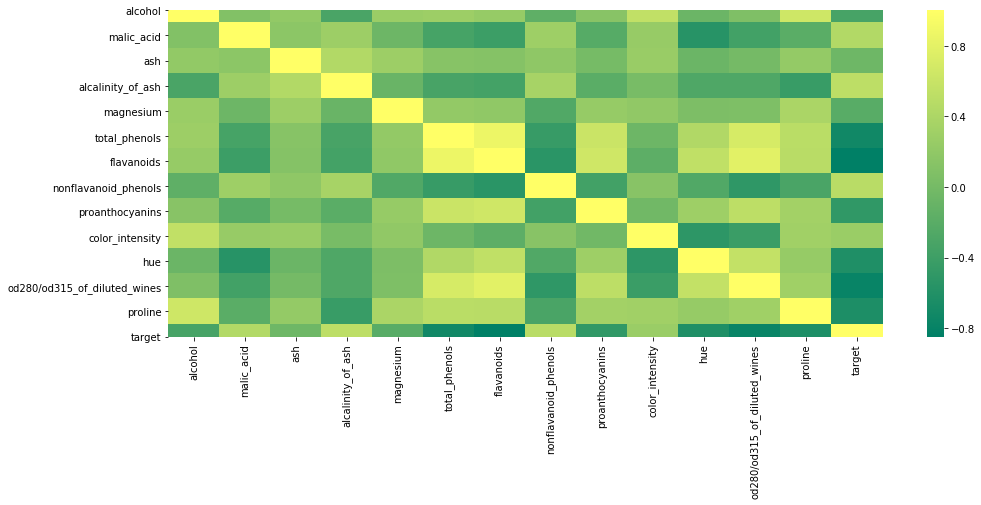

In [7]:
plt.figure(figsize = (16,6))
sns.heatmap(wine.corr(), cmap="summer")

#### Lets see whats correlatied to the Alcohol content 
- proline

In [8]:
wine.corr()["alcohol"].sort_values(ascending = False)

alcohol                         1.000000
proline                         0.643720
color_intensity                 0.546364
total_phenols                   0.289101
magnesium                       0.270798
flavanoids                      0.236815
ash                             0.211545
proanthocyanins                 0.136698
malic_acid                      0.094397
od280/od315_of_diluted_wines    0.072343
hue                            -0.071747
nonflavanoid_phenols           -0.155929
alcalinity_of_ash              -0.310235
target                         -0.328222
Name: alcohol, dtype: float64

#### Observation of the distribution of wine types in the our data set
- more type 1 than 0 and 2 and more 0 than 2

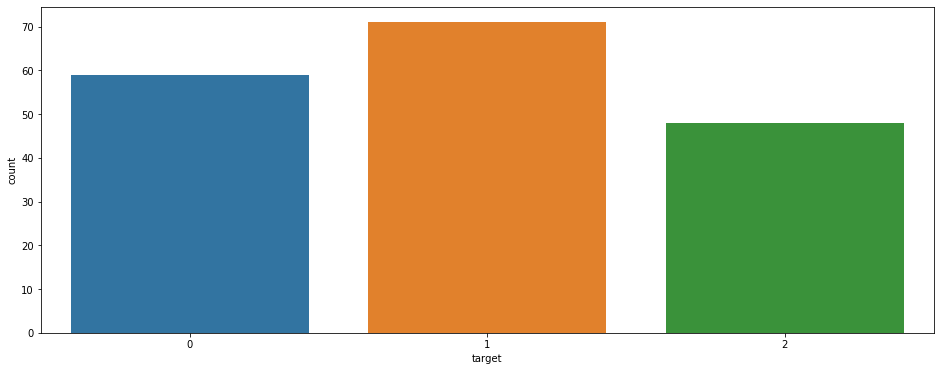

In [9]:
plt.figure(figsize = (16,6))
sns.countplot(x = "target", data=wine);

### alcohol quantity in each type of wine
- type 0 has more of a alcohol content, followed by 2. So our data has more wine with a lower alcohol content based on the plot above

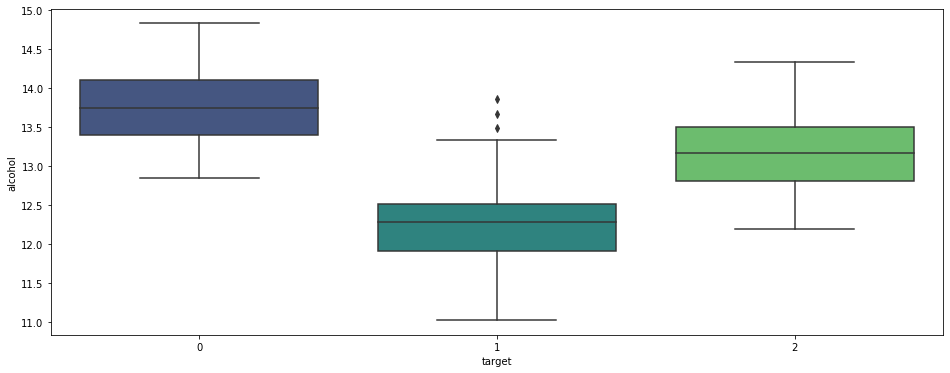

In [10]:
plt.figure(figsize = (16,6))
sns.boxplot(x = "target", y="alcohol", data=wine, palette="viridis")

### A look at the color intensity to  proline
- appears as the alcohol content increases the porline does as well
- This agrees with the correlaiton plot above as well as the alsohol content in each wine type

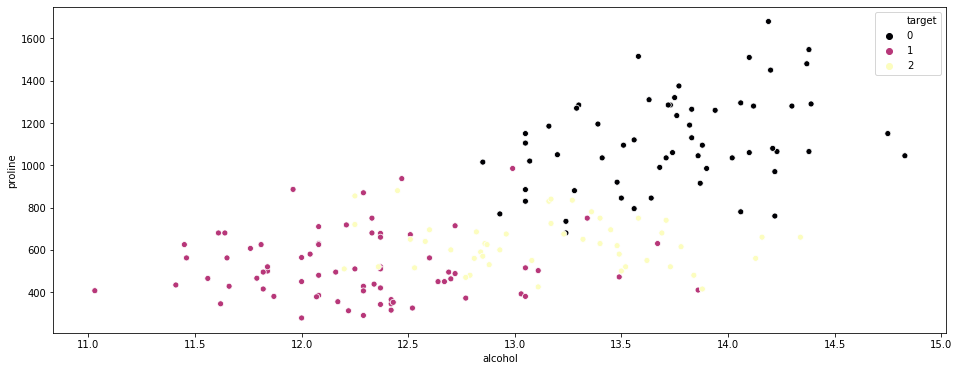

In [11]:
plt.figure(figsize = (16,6))
sns.scatterplot(x = "alcohol", y = "proline", data=wine, hue="target", palette="magma");

### Training our data

In [69]:
from tensorflow.keras.utils import to_categorical

In [70]:
X = wine.drop('target', axis=1).values
y = to_categorical(wine["target"].values)

## Train test split

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Scale the data

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
scalar = MinMaxScaler()

In [75]:
X_train = scalar.fit_transform(X_train)

In [76]:
X_test = scalar.transform(X_test)

### Creating our model

In [77]:
X_train.shape

(124, 13)

In [78]:
y_train.shape

(124, 3)

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

In [80]:
logdir = "resources/logs/fit"

board = TensorBoard(log_dir= logdir,
    histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2,
    embeddings_freq=1,
    embeddings_metadata=None,)

In [81]:
stop = EarlyStopping(monitor="val_loss", verbose=2, mode="min", patience=30)

In [82]:
model = Sequential()
model.add(Dense(units = 13, activation = "relu"))
model.add(Dense(units = 13, activation = "relu"))
model.add(Dense(units = 3, activation = "softmax"))
model.compile(optimization = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [83]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=500,callbacks=[stop, board])

Train on 124 samples, validate on 54 samples
Epoch 1/500
124/124 [==============================] - 2s 20ms/sample - loss: 1.1278 - accuracy: 0.3871 - val_loss: 1.0921 - val_accuracy: 0.4074
Epoch 2/500
124/124 [==============================] - 0s 2ms/sample - loss: 1.0951 - accuracy: 0.3871 - val_loss: 1.0679 - val_accuracy: 0.4074
Epoch 3/500
124/124 [==============================] - 0s 1ms/sample - loss: 1.0763 - accuracy: 0.3871 - val_loss: 1.0524 - val_accuracy: 0.4444
Epoch 4/500
124/124 [==============================] - 0s 2ms/sample - loss: 1.0652 - accuracy: 0.4032 - val_loss: 1.0411 - val_accuracy: 0.4444
Epoch 5/500
124/124 [==============================] - 0s 1ms/sample - loss: 1.0550 - accuracy: 0.4274 - val_loss: 1.0298 - val_accuracy: 0.4630
Epoch 6/500
124/124 [==============================] - 0s 2ms/sample - loss: 1.0434 - accuracy: 0.4758 - val_loss: 1.0176 - val_accuracy: 0.5000
Epoch 7/500
124/124 [==============================] - 0s 2ms/sample - loss: 1.0321 

Epoch 57/500
124/124 [==============================] - 0s 1ms/sample - loss: 0.4649 - accuracy: 0.9355 - val_loss: 0.4255 - val_accuracy: 0.9444
Epoch 58/500
124/124 [==============================] - 0s 2ms/sample - loss: 0.4494 - accuracy: 0.9355 - val_loss: 0.4168 - val_accuracy: 0.9444
Epoch 59/500
124/124 [==============================] - 0s 1ms/sample - loss: 0.4408 - accuracy: 0.9355 - val_loss: 0.4074 - val_accuracy: 0.9444
Epoch 60/500
124/124 [==============================] - 0s 2ms/sample - loss: 0.4307 - accuracy: 0.9355 - val_loss: 0.4003 - val_accuracy: 0.9444
Epoch 61/500
124/124 [==============================] - 0s 2ms/sample - loss: 0.4205 - accuracy: 0.9355 - val_loss: 0.3923 - val_accuracy: 0.9259
Epoch 62/500
124/124 [==============================] - 0s 1ms/sample - loss: 0.4115 - accuracy: 0.9355 - val_loss: 0.3830 - val_accuracy: 0.9444
Epoch 63/500
124/124 [==============================] - 0s 1ms/sample - loss: 0.4022 - accuracy: 0.9355 - val_loss: 0.3756 -

Epoch 113/500
124/124 [==============================] - 0s 2ms/sample - loss: 0.1266 - accuracy: 0.9758 - val_loss: 0.1420 - val_accuracy: 0.9444
Epoch 114/500
124/124 [==============================] - 0s 1ms/sample - loss: 0.1246 - accuracy: 0.9919 - val_loss: 0.1400 - val_accuracy: 0.9630
Epoch 115/500
124/124 [==============================] - 0s 2ms/sample - loss: 0.1216 - accuracy: 0.9758 - val_loss: 0.1397 - val_accuracy: 0.9444
Epoch 116/500
124/124 [==============================] - 0s 1ms/sample - loss: 0.1191 - accuracy: 0.9839 - val_loss: 0.1368 - val_accuracy: 0.9630
Epoch 117/500
124/124 [==============================] - 0s 1ms/sample - loss: 0.1180 - accuracy: 0.9839 - val_loss: 0.1365 - val_accuracy: 0.9444
Epoch 118/500
124/124 [==============================] - 0s 1ms/sample - loss: 0.1165 - accuracy: 0.9839 - val_loss: 0.1338 - val_accuracy: 0.9444
Epoch 119/500
124/124 [==============================] - 0s 2ms/sample - loss: 0.1137 - accuracy: 0.9839 - val_loss: 0

Epoch 169/500
124/124 [==============================] - 0s 2ms/sample - loss: 0.0578 - accuracy: 0.9919 - val_loss: 0.0720 - val_accuracy: 0.9815
Epoch 170/500
124/124 [==============================] - 0s 1ms/sample - loss: 0.0571 - accuracy: 0.9919 - val_loss: 0.0715 - val_accuracy: 0.9815
Epoch 171/500
124/124 [==============================] - 0s 2ms/sample - loss: 0.0546 - accuracy: 0.9919 - val_loss: 0.0710 - val_accuracy: 0.9815
Epoch 172/500
124/124 [==============================] - 0s 1ms/sample - loss: 0.0537 - accuracy: 0.9919 - val_loss: 0.0696 - val_accuracy: 0.9815
Epoch 173/500
124/124 [==============================] - 0s 2ms/sample - loss: 0.0552 - accuracy: 0.9919 - val_loss: 0.0684 - val_accuracy: 0.9815
Epoch 174/500
124/124 [==============================] - 0s 2ms/sample - loss: 0.0535 - accuracy: 0.9919 - val_loss: 0.0677 - val_accuracy: 0.9815
Epoch 175/500
124/124 [==============================] - 0s 1ms/sample - loss: 0.0528 - accuracy: 0.9919 - val_loss: 0

Epoch 225/500
124/124 [==============================] - 0s 2ms/sample - loss: 0.0294 - accuracy: 0.9919 - val_loss: 0.0427 - val_accuracy: 1.0000
Epoch 226/500
124/124 [==============================] - 0s 1ms/sample - loss: 0.0295 - accuracy: 0.9919 - val_loss: 0.0420 - val_accuracy: 1.0000
Epoch 227/500
124/124 [==============================] - 0s 2ms/sample - loss: 0.0294 - accuracy: 0.9919 - val_loss: 0.0443 - val_accuracy: 0.9815
Epoch 228/500
124/124 [==============================] - 0s 2ms/sample - loss: 0.0278 - accuracy: 1.0000 - val_loss: 0.0414 - val_accuracy: 1.0000
Epoch 229/500
124/124 [==============================] - 0s 1ms/sample - loss: 0.0318 - accuracy: 0.9919 - val_loss: 0.0428 - val_accuracy: 1.0000
Epoch 230/500
124/124 [==============================] - 0s 2ms/sample - loss: 0.0274 - accuracy: 0.9919 - val_loss: 0.0416 - val_accuracy: 1.0000
Epoch 231/500
124/124 [==============================] - 0s 1ms/sample - loss: 0.0286 - accuracy: 0.9919 - val_loss: 0

Epoch 336/500
124/124 [==============================] - 0s 1ms/sample - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0162 - val_accuracy: 1.0000
Epoch 337/500
124/124 [==============================] - 0s 2ms/sample - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.0165 - val_accuracy: 1.0000
Epoch 338/500
124/124 [==============================] - 0s 2ms/sample - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 339/500
124/124 [==============================] - 0s 2ms/sample - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0143 - val_accuracy: 1.0000
Epoch 340/500
124/124 [==============================] - 0s 2ms/sample - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.0174 - val_accuracy: 1.0000
Epoch 341/500
124/124 [==============================] - 0s 2ms/sample - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 342/500
124/124 [==============================] - 0s 1ms/sample - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0

Epoch 392/500
124/124 [==============================] - 0s 2ms/sample - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 393/500
124/124 [==============================] - 0s 1ms/sample - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 394/500
124/124 [==============================] - 0s 2ms/sample - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 395/500
124/124 [==============================] - 0s 2ms/sample - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 396/500
124/124 [==============================] - 0s 2ms/sample - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 397/500
124/124 [==============================] - 0s 2ms/sample - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 398/500
124/124 [==============================] - 0s 2ms/sample - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0

Epoch 448/500
124/124 [==============================] - 0s 1ms/sample - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 449/500
124/124 [==============================] - 0s 1ms/sample - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 450/500
124/124 [==============================] - 0s 2ms/sample - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 451/500
124/124 [==============================] - 0s 2ms/sample - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 452/500
124/124 [==============================] - 0s 2ms/sample - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 453/500
124/124 [==============================] - ETA: 0s - loss: 8.5941e-04 - accuracy: 1.00 - 0s 2ms/sample - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 454/500
124/124 [==============================] - 0s 1ms/sample -

In [84]:
metrics  = pd.DataFrame(model.history.history)

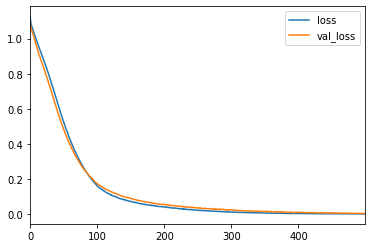

In [85]:
metrics[["loss", "val_loss"]].plot()

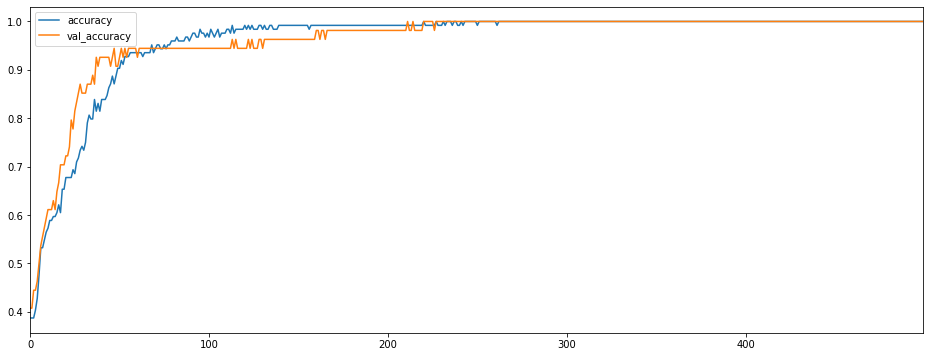

In [86]:
metrics[["accuracy", "val_accuracy"]].plot(figsize = (16,6))

In [87]:
from sklearn.metrics import classification_report,confusion_matrix

In [88]:
predict = model.predict_classes(X_test)

In [90]:
y_test

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0

In [91]:
y_test_converted = np.argmax(y_test, axis=1)

In [92]:
y_test_converted

array([0, 0, 2, 0, 2, 1, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2,
       2, 2, 0, 0, 1, 1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 1,
       2, 1, 1, 2, 2, 1, 0, 1, 1, 0])

## Model Predicitons
- Model Predictied 100% accuracy in classifying the wine
- WE will test this below

In [93]:
print(classification_report(y_test_converted, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        13

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



## Random Predictions
- Lets see how our model will work if we passed it random images

In [98]:
mynumber = X_test[0]

In [99]:
mynumber

array([0.53157895, 0.1798419 , 0.63978495, 0.3814433 , 0.23809524,
       0.49090909, 0.56647399, 0.30188679, 0.32492114, 0.21171171,
       0.4957265 , 0.45421245, 0.58633094])

In [134]:
from random import randint
random_index = randint(1, len(X_test))
new_wine = X_test[random_index]

In [135]:
new_wine

array([0.53947368, 0.62450593, 0.53763441, 0.56185567, 0.41666667,
       0.11272727, 0.26589595, 0.39622642, 0.23028391, 0.67567568,
       0.02564103, 0.02197802, 0.18705036])

In [136]:
model.predict_classes(new_wine.reshape(1,13))

array([2])

In [137]:
y_test_converted[random_index]

2

In [138]:
y_test_converted

array([0, 0, 2, 0, 2, 1, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2,
       2, 2, 0, 0, 1, 1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 1,
       2, 1, 1, 2, 2, 1, 0, 1, 1, 0])